In [3]:
%load_ext autoreload 
%autoreload 2

In [4]:
### plot distance from global mean for a given command 

In [5]:
cd ~/bmi_dynamics_code/

/Users/preeyakhanna/bmi_dynamics_code


In [6]:
from online_analysis import plot_fr_diffs, plot_pred_fr_diffs, util_fcns, generate_models
import analysis_config
import math

In [74]:
########## Plot pop distance ###########

_, _, _, pooled_stats = plot_fr_diffs.perc_neuron_command_move_sig(nshuffs=100, 
                                                                        keep_bin_spk_zsc=False, 
                                                                        match_pos = False, 
                                                                       factor_global_gt_mov = 2, nsessions=1)

online_analysis/plot_fr_diffs.py:1466: RuntimeWarning: invalid value encountered in double_scalars
  perc_sig[animal, day_ix][mag, ang, mov].append(np.array((pv, dFR, dFR/global_mean_FR[i_neur], global_mean_FR[i_neur]), dtype=dtype_su))


In [76]:
## Fill in 
### dmean_FR, dmFR_shuffle, mag, ang, mov, global_mean_FR
dat = pooled_stats['grom', 0]

### Populate with true distances ####
x = populate_matrix(dat)

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


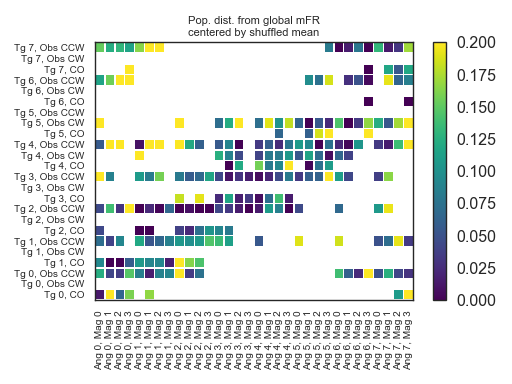

In [78]:
########## Showing distribution of mean differences ##############
f = plot_x(x, vmax=.2, title='Pop. dist. from global mFR\n centered by shuffled mean ')
util_fcns.savefig(f, 'pop_dist_grom_0_all_com_conds')

#plot_x(xp, vmax=.1)
# f, ax = plt.subplots()
# ang_adj = np.mod(7 + 3, 8)
# com_ix = ang_adj*4 + 0

# ax.plot(x[com_ix, :], 'k.-')
# ax.plot(xp[com_ix, :], 'b.-')

In [ ]:
ut

In [ ]:
########## Showing predictions of mean differences ##############

In [45]:
spks_mean, pred_spks_mean = get_comm_mov_mFR('grom', 0)

In [46]:
### Get spikes mean and predictions ##
x, xp = populate_matrix_PC1(spks_mean, pred_spks_mean)

Number of dim 44, number of obs 4
Ang 7, Mag 3, com ix 11
Number of dim 44, number of obs 7
Ang 1, Mag 3, com ix 19
Number of dim 44, number of obs 6
Ang 3, Mag 0, com ix 24
Number of dim 44, number of obs 5
Ang 2, Mag 1, com ix 21
Number of dim 44, number of obs 7
Ang 6, Mag 2, com ix 6
Number of dim 44, number of obs 9
Ang 5, Mag 1, com ix 1
Number of dim 44, number of obs 3
Ang 0, Mag 3, com ix 15
Number of dim 44, number of obs 8
Ang 7, Mag 2, com ix 10
Number of dim 44, number of obs 7
Ang 4, Mag 0, com ix 28
Number of dim 44, number of obs 7
Ang 1, Mag 2, com ix 18
Number of dim 44, number of obs 7
Ang 3, Mag 3, com ix 27
Number of dim 44, number of obs 4
Ang 6, Mag 3, com ix 7
Number of dim 44, number of obs 9
Ang 5, Mag 0, com ix 0
Number of dim 44, number of obs 7
Ang 2, Mag 2, com ix 22
Number of dim 44, number of obs 9
Ang 4, Mag 1, com ix 29
Number of dim 44, number of obs 7
Ang 1, Mag 1, com ix 17
Number of dim 44, number of obs 5
Ang 3, Mag 2, com ix 26
Number of dim 44, 

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from ipykernel import kernelapp as app
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:47: 

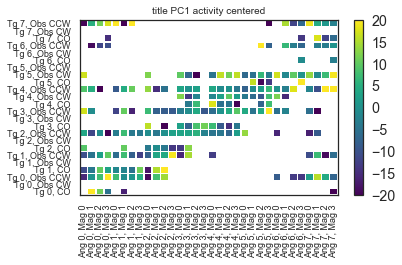

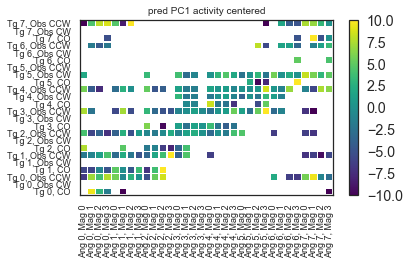

In [47]:
### Plot grid ### 
f1 = plot_x(x, vmin = -20, vmax=20, title='title PC1 activity centered')
f2 = plot_x(xp,vmin = -10, vmax=10, title='pred PC1 activity centered')

util_fcns.savefig(f1, 'pc1_pop_activity_centered_all_com_conds')
util_fcns.savefig(f2, 'pc1_pred_pop_activity_centered_all_com_conds')

In [83]:
### Plot true avg. next command predicted next command ### 
### Plot angle #######
push_predictions = get_next_commands('grom', 0)

In [71]:
### populate angle matrix ### 
x, xp = populate_push(push_predictions)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


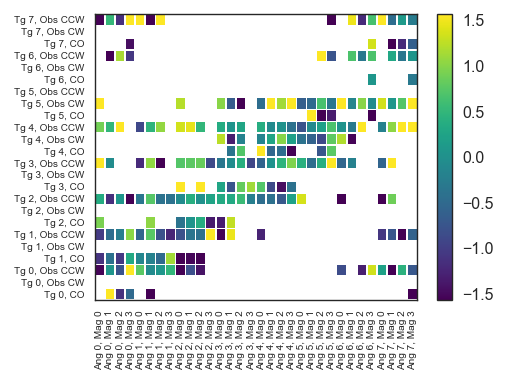

<IPython.core.display.Javascript object>


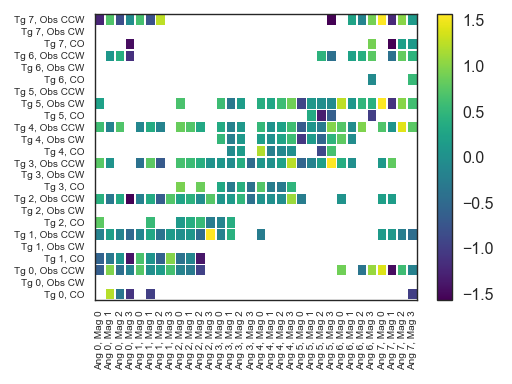

In [84]:
f1 = plot_x(x, vmin=-np.pi/2., vmax=np.pi/2.)
f2 = plot_x(xp, vmin=-np.pi/2., vmax=np.pi/2.)

util_fcns.savefig(f1, 'next_command_angle_centered')
util_fcns.savefig(f2, 'pred_next_command_angle_centered')


In [20]:
def populate_matrix(dat): 
    x = np.zeros((32, 24)) 
    x[:, :] = np.nan
    
    for i_d, dt in enumerate(dat): 
        dmean_FR, dmFR_shuffle, mag, ang, mov, global_FR = dt; 
    
        ### number of neurons ##
        nneuron = float(len(dmean_FR))

        ### Distance from global FR ### 
        dmn = np.linalg.norm(dmean_FR)/nneuron

        ### Already subtracted global FR (abs(shuff - global))
        dmn_shuff = np.linalg.norm(dmFR_shuffle, axis=1)/nneuron

        ## Angle zero is actually pointing to target 3; 
        ## Angle 1 is target 4, etc; 
        ang_adj = np.mod(ang + 3, 8)
        com_ix = ang_adj*4 + mag

        ### Move ID 
        mov_id = assign_mov([mov]) 

        x[com_ix, mov_id] = dmn - np.mean(dmn_shuff)
    
    return x

In [21]:
def plot_x(x, vmin = 0, vmax = .2, title=''): 
    f, ax = plt.subplots()
    cax = ax.pcolormesh(x.T, vmin=vmin, vmax=vmax, cmap='viridis', edgecolors='w', linewidths=.51)
    xticks = []; xlabs = []; 
    for mag in range(4): 
        for ang in range(8): 
            xticks.append(ang*4+mag+.5)

            xlabs.append('Ang %d, Mag %d'%(ang, mag))

    yticks = []; ylabs = []; 
    for tg in range(8): 
        yticks.append((3*tg)+.5)
        ylabs.append('Tg %d, CO'%tg)

        yticks.append((3*tg) + 1.5)
        ylabs.append('Tg %d, Obs CW'%tg)

        yticks.append(3*tg + 2.5)
        ylabs.append('Tg %d, Obs CCW'%tg)

    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabs, fontsize=9, rotation=90)
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabs, fontsize=9, rotation=0)
    ax.set_title(title, fontsize=10)
    plt.colorbar(cax, ax=ax)
    plt.tight_layout()
    return f

In [44]:
def get_comm_mov_mFR(animal, day_ix): 
    
    #### Predicted mean deviations from global #######
    pred_spks_mean = {}; spks_mean = {}; 

    model_set_number = 6; 
    model_fname = analysis_config.config[animal+'_pref']+'tuning_models_'+animal+'_model_set'+str(model_set_number)+'_.pkl'
    model_dict = pickle.load(open(model_fname, 'rb'))
    model_nm = 'hist_1pos_0psh_2spksm_1_spksp_0'

    ### Spks predicted + true ##
    pred_spks = 10*model_dict[0, model_nm]
    spks = 10*model_dict[0, 'spks']
    assert(spks.shape == pred_spks.shape)

    mag_boundaries = pickle.load(open(analysis_config.data_params['mag_bound_file']))
    command_bins = util_fcns.commands2bins([model_dict[day_ix, 'np']], mag_boundaries, animal, day_ix, 
                                                   vel_ix=[0, 1])[0]
    move = model_dict[0, 'trg'] + 10*model_dict[0, 'task']

    for ang in range(8): 
        for mag in range(4): 

            pred_spks_mean[ang, mag] = []; 
            spks_mean[ang, mag] = []; 

            ### Get command indices ##
            ix_com = np.nonzero(np.logical_and(command_bins[:, 0]==mag, command_bins[:, 1] == ang))[0]

            ### Get movements ###
            mvs = np.unique(move[ix_com])

            for m in mvs: 

                ### Get command-mov
                mv_ix_com = np.nonzero(move[ix_com] == m)[0]
                if len(mv_ix_com) >= 15: 
                    ### print('Adding %d, %d, %.1f'%(ang, mag, m))
                    ### Add prediction of spks
                    pred_spks_mean[ang, mag].append([m, np.mean(pred_spks[ix_com[mv_ix_com]], axis=0)])
                    spks_mean[ang, mag].append([m, np.mean(spks[ix_com[mv_ix_com]], axis=0)])
    return spks_mean, pred_spks_mean

In [23]:
def get_next_commands(animal, day_ix):
    
    ### Mag boundaries ####
    mag_boundaries = pickle.load(open(analysis_config.data_params['mag_bound_file']))

    #### Note that this is NOT conditioned on push ####
    model_nm = 'hist_1pos_0psh_0spksm_1_spksp_0'
    model_set_number = 6
    model_fname = analysis_config.config[animal+'_pref']+'tuning_models_'+animal+'_model_set'+str(model_set_number)+'_.pkl'
    model_dict = pickle.load(open(model_fname, 'rb'))
    KG = util_fcns.get_decoder(animal, day_ix)

    ##### Get the predicted spikes ######
    pred_spks = 10*model_dict[day_ix, model_nm]

    ##### get predicted command ######
    pred_push = np.dot(KG, pred_spks.T).T
    N = pred_push.shape[0]
    pred_push = np.hstack((np.zeros((N, 3)), pred_push[:, 0][:, np.newaxis], 
        np.zeros((N, 1)), pred_push[:, 1][:, np.newaxis], np.zeros((N, 1))))

    #### Get other stuff #####
    spks, push, tsk, trg, bin_num, rev_bin_num, move, dat = util_fcns.get_data_from_shuff(animal, day_ix)
    spks = spks*10
    
    ### Get tm0/tm1 to match 
    tm0, tm1 = generate_models.get_temp_spks_ix(dat['Data'])
    push_tm0 = push[tm0, :]
    push_tm1 = push[tm1, :]
    move_tm1 = move[tm1]
    
    ### Want to know push at tm1 --> so then can get estimate of push at tm0 for "next command"
    command_bins_tm1 = util_fcns.commands2bins([push_tm1], mag_boundaries, animal, day_ix, 
                                       vel_ix=[3, 5])[0]
    mov_tm1 = move[tm1]
    
    store_push = {}
    
    for ang in range(8): 
        for mag in range(4): 
            
            store_push[ang, mag] = []
            
            ### command-indices ### 
            ix_com = np.nonzero((command_bins_tm1[:, 0] == mag) & (command_bins_tm1[:, 1] == ang))[0]
            
            ### iterate through movements ### 
            for i_m, mov in enumerate(np.unique(move_tm1[ix_com])): 
                
                ### movement-indices ###
                ix_ = np.nonzero(mov_tm1[ix_com] == mov)[0]
                ix = ix_com[ix_]
                
                if len(ix) >= 15: 
                    
                    ## Note it : 
                    mn_push_tm1 = np.mean(push_tm1[np.ix_(ix, [3, 5])], axis=0)
                    mn_push_tm0 = np.mean(push_tm0[np.ix_(ix, [3, 5])], axis=0)
                    mn_pred_tm0 = np.mean(pred_push[np.ix_(ix, [3, 5])], axis=0)
                    
                    store_push[ang, mag].append([mov, mn_push_tm1, mn_push_tm0, mn_pred_tm0])
    return store_push

In [24]:
def assign_mov(movs): 
    
    ### Iterate through movements ###
    mov_ids = []
    for mov in movs: 

        ### get mov index
        tg = np.floor(mov) 
        if mov > 10: 
            dt = np.round(mov - tg, 1)
            if dt == 0: 
                mov_id = 3*(int(tg) - 10) + 1
            elif dt == .1: 
                mov_id = 3*(int(tg) - 10) + 2
        else: 
            mov_id = 3*int(mov)
        mov_ids.append(mov_id)
    return np.array(mov_ids)

In [32]:
def populate_matrix_PC1(spks_mean, pred_spks_mean): 
    
    x = np.zeros((32, 24)) 
    x[:, :] = np.nan
    
    xp = np.zeros((32, 24)) 
    xp[:, :] = np.nan
    
    ### For each mag/ang/mov
    commands = spks_mean.keys(); 
    
    for i_c, (ang, mag) in enumerate(commands): 
        
        mov_true = np.array([dat[0] for dat in spks_mean[ang, mag]])
        fr = np.vstack((dat[1] for dat in spks_mean[ang, mag]))
        
        mov_pred = np.array([dat[0] for dat in pred_spks_mean[ang, mag]])
        pred_fr = np.vstack((dat[1] for dat in pred_spks_mean[ang, mag]))
        
        ## Get PCA model ## 
        _, pc_model, _ = util_fcns.PCA(fr, 1, mean_subtract = True, skip_dim_assertion=True)
        
        ## Transform true and pred data ### 
        trans_true = util_fcns.dat2PC(fr, pc_model)
        trans_pred = util_fcns.dat2PC(pred_fr, pc_model)
        
        mean_sub = np.mean(trans_true)
        mean_sub2 = np.mean(trans_pred)
                       
        mov_true_id = assign_mov(mov_true)
        mov_pred_id = assign_mov(mov_pred)
        
        
        ### Get the right ang / mag places ### 
        ang_adj = np.mod(ang + 3, 8)
        com_ix = ang_adj*4 + mag
        print('Ang %d, Mag %d, com ix %d'%(ang, mag, com_ix))
        
        trans_true = np.squeeze(trans_true) - mean_sub
        trans_pred = np.squeeze(trans_pred) - mean_sub2
        
        ### Iterate through ### 
        for _, (movid_true_, true_, movid_pred_, pred_) in enumerate(zip(mov_true_id, 
                                                                         trans_true, mov_pred_id, trans_pred)):
            ### Fill in array ## 
            x[com_ix, movid_true_] = true_
            xp[com_ix, movid_pred_] = pred_
    
    return x, xp

In [26]:
def populate_push(data): 
    #store_push[ang, mag].append([mov, mn_push_tm1, mn_push_tm0, mn_pred_tm0])
    x = np.zeros((32, 24))
    x[:, :] = np.nan 
    
    xp = np.zeros((32, 24))
    xp[:, :] = np.nan 
    
    commands = data.keys()
    
    for i_c, (ang, mag) in enumerate(commands): 
        
        ang_adj = np.mod(ang + 3, 8)
        com_ix = ang_adj*4 + mag
        
        mov = np.array([dat[0] for dat in data[ang, mag]])
        mov_id = assign_mov(mov) 
        
        ## Activity ## 
        push_tm0 =  np.vstack((dat[2] for dat in data[ang, mag]))
        pred_tm0 =  np.vstack((dat[3] for dat in data[ang, mag]))
        
        mn_push_tm0 = np.mean(push_tm0, axis=0)
        mn_ang = get_angle(mn_push_tm0[np.newaxis, :])
        
        ### Get angle ##
        push_tm0_ang = get_angle(push_tm0)
        pred_tm0_ang = get_angle(pred_tm0)
        
        ## Populate X 
        for _, (mv, t0_ang, pred_t0_ang) in enumerate(zip(mov_id, push_tm0_ang, pred_tm0_ang)):
            x[com_ix, mv] = t0_ang - mn_ang
            xp[com_ix, mv] = pred_t0_ang - mn_ang
    return x, xp
        
        

In [27]:
def get_angle(array):
    ang = []
    for i in range(array.shape[0]): 
        ang.append(math.atan2(array[i, 1], array[i, 0]))
    return np.array(ang)

In [19]:
model_dict.keys()

[(3, 'np'),
 (1, 'hist_1pos_0psh_0spksm_1_spksp_0', 4, 0.0, 'model'),
 (1, 'bin_num'),
 (1, 'hist_1pos_0psh_0spksm_1_spksp_0', 1, 0.0, 'model'),
 (3, 'hist_1pos_0psh_0spksm_1_spksp_0', 3, 0.0, 'test_ix'),
 (1, 'hist_1pos_0psh_0spksm_1_spksp_0', 4, 0.0, 'test_ix'),
 (3, 'pos_tm1'),
 (2, 'hist_1pos_0psh_2spksm_1_spksp_0', 3, 0.0, 'model'),
 (1, 'hist_1pos_0psh_0spksm_1_spksp_0', 2, 0.0, 'test_ix'),
 (2, 'pos'),
 (3, 'hist_1pos_0psh_0spksm_1_spksp_0', 2, 0.0, 'test_ix'),
 (1, 'spks'),
 (0, 'task'),
 (1, 'hist_1pos_0psh_2spksm_1_spksp_0', 2, 0.0, 'model'),
 (1, 'day_bin_ix'),
 (0, 'vel'),
 (0, 'hist_1pos_0psh_0spksm_1_spksp_0', 0, 0.0, 'model'),
 (1, 'trl'),
 (2, 'bin_num'),
 (2, 'hist_1pos_0psh_2spksm_1_spksp_0', 1, 0.0, 'test_ix'),
 (2, 'hist_1pos_0psh_0spksm_1_spksp_0', 3, 0.0, 'test_ix'),
 (0, 'hist_1pos_0psh_0spksm_1_spksp_0'),
 (3, 'hist_1pos_0psh_0spksm_1_spksp_0', 1, 0.0, 'test_ix'),
 (1, 'hist_1pos_0psh_2spksm_1_spksp_0', 4, 0.0, 'model'),
 (1, 'hist_1pos_0psh_2spksm_1_spksp_0', 3

In [88]:
%matplotlib notebook

<IPython.core.display.Javascript object>


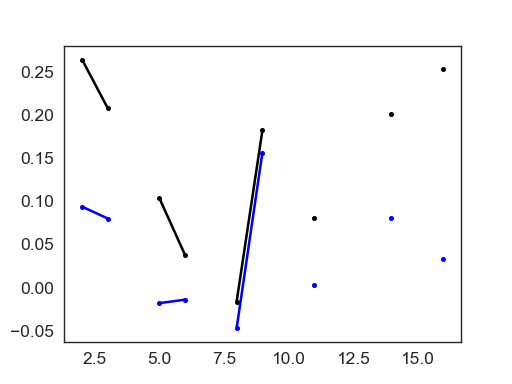

In [101]:
plot_x(x)
plot_x(xp, vmax=.15)

f, ax = plt.subplots()
ang_adj = np.mod(7 + 3, 8)
com_ix = ang_adj*4 + 0

ax.plot(x[com_ix, :], 'k.-')
ax.plot(xp[com_ix, :], 'b.-')

In [40]:
######### show predicted distances ?? ############

Shuffle 0, 2.42091
Done with big fcn, 7.26530
End Cnt: 386
pv_all
[0.29392474 0.83062357]
End Cnt: 386
Number of dim 44, number of obs 9
TIme decay [0.32992634 0.29336885]
Hz 0.000, 0.000


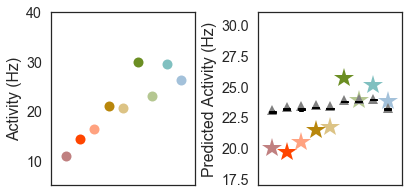

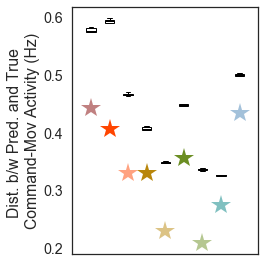

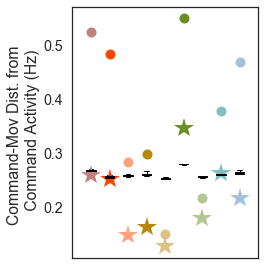

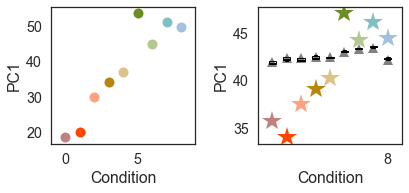

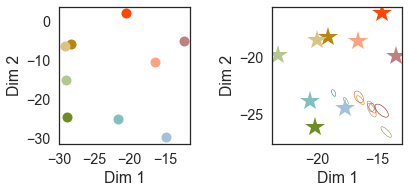

In [43]:
plot_pred_fr_diffs.plot_example_neuron_comm_predictions(nshuffs=10)

Shuffle 0, 2.11793
Done with big fcn, 5.52514
End Cnt: 386
pv_all
[0.29392474 0.83062357]
End Cnt: 386
Number of dim 44, number of obs 9
mean PC1 30.71 mean pred PC1 33.08


online_analysis/plot_pred_fr_diffs.py:589: ComplexWarning: Casting complex values to real discards the imaginary part
  ### Project data and plot ###


TIme decay [0.32992634 0.29336885]
Hz 0.000, 0.000


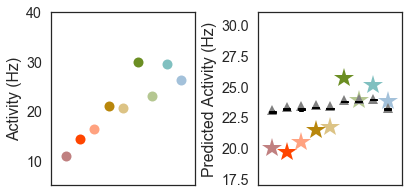

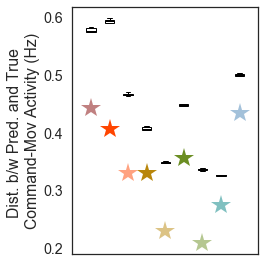

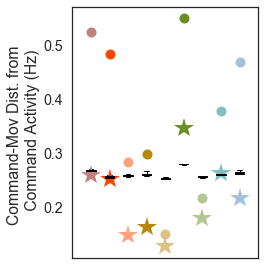

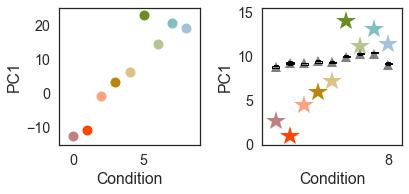

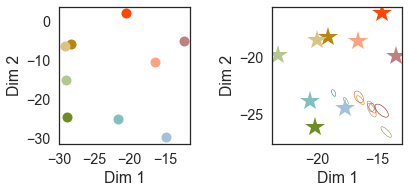

In [53]:
plot_pred_fr_diffs.plot_example_neuron_comm_predictions(nshuffs=10, mean_sub_PC=True)